In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/hp/Downloads/iris_dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


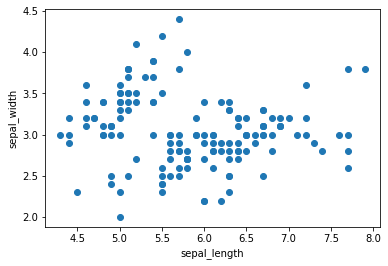

In [4]:
## look at data
plt.scatter(data["sepal_length"],data["sepal_width"])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

#### Is Standardization Needed

In [5]:
from sklearn import preprocessing as p
k=p.scale(data)

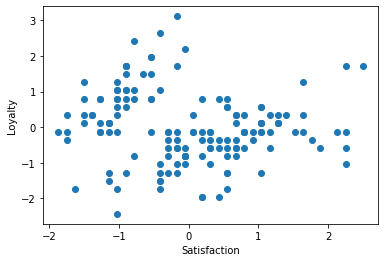

In [6]:
k1=pd.DataFrame(k)
plt.scatter(k1[0],k1[1])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In Clustering standardization of data will not necessary like regression.

In [7]:
from sklearn.cluster import KMeans
model=KMeans(3,init="k-means++") ## suggest no of clusters
model.fit(data)
y=model.fit_predict(data) ## predicts clusters

## Metrics
    1. WCSS (with in cluster sum of squares): sum of squares of distance b/w data point and cluster centroid. 
    2. silhoutte_score ( ranges -1 to 1) : tells about how well clusters are separated

In [8]:
from sklearn.metrics import silhouette_score
print("WCSS (with in cluster sum of squares): {}".format(model.inertia_))
print("silhouette_score: {}".format(silhouette_score(data,model.labels_)))

WCSS (with in cluster sum of squares): 78.94084142614601
silhouette_score: 0.5525919445499757


### Finding Optimal K

In [9]:
wcss=[]
sco=[]
for i in range(2,9):
    model=KMeans(i)
    model.fit(data)
    wcss.append(model.inertia_)
    sco.append(silhouette_score(data,model.labels_))

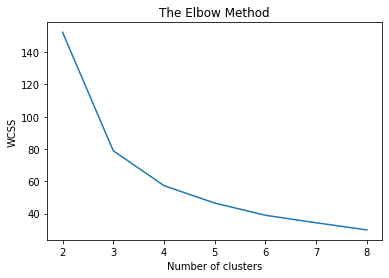

In [10]:
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

one can see more than 1 elbow. pick a k value where is no much difference than previous k-value.

    Optimal k-values: 3
    Sub optimal k-values: 4,5.

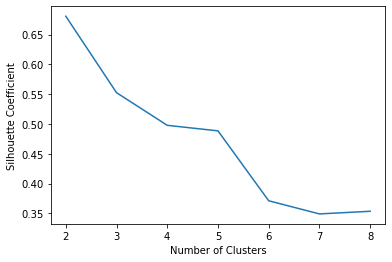

In [11]:
## shiloutte score for various k-values
plt.plot(range(2,9), sco)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)
kmeans.cluster_centers_
data= pd.concat([pd.DataFrame(data),pd.DataFrame({'cluster':kmeans.labels_})],axis=1)